    Copyright (C) 2018 Juan Pablo Carbajal
    This program is free software; you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation; either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <http://www.gnu.org/licenses/>.

# Paradox Galore!
by JuanPi Carbajal

The presentation is based on the books

<table><tr>
<td> <img alt="The book of Why" src="http://t3.gstatic.com/images?q=tbn:ANd9GcTbOkoh_RNaykzFzynsojY-oHo_SYpka73ddjO0FwIOXIfXodxu" width="350"/> </td>
<td> <img alt="Elements of causal inference" src="https://images.gr-assets.com/books/1514097056l/34889379.jpg" width="350" /> </td>
</tr></table>



In [1]:
using PyPlot
using Statistics
using Printf

## Kidney stones
The table below shows the success rate of two treatment for kidney stones.
Which treatment is better?

|Treatment<br>$T \in {0,1}$ | <center>Overall</center>| <center>Small stone<br>$S=0$</center> | <center>Large stone<br>$S=1$</center> 
|--------------------------------|-----------------|---------------|-----------------
|Open surgery                    |78% (273/350)    |**93%** (81/87)| **73%** (192/263) 
|Percutaneous<br>nephrolithotomy |**83%** (289/350)|87% (234/270)  | 69% (55/80)       

Reference:
> Charig, C. R., Webb, D. R., Payne, S. R., & Wickham, J. E. (1986). Comparison of treatment of renal calculi by open surgery, percutaneous nephrolithotomy, and extracorporeal shockwave lithotripsy. Br Med J (Clin Res Ed), 292(6524), 879-882.




## Simpson's paradox: confounder or common cause

![Simposon's paradox: confounder](simpsonsconfounder_CG.svg)

In [2]:
# Confounder
nS = Int(1e3);   # number of samples
K = rand([-1,1], nS);
C = 0.3 * randn(nS) + 0.3 * K;
E = C + 0.6 * randn(nS) - 0.9 * K;

@printf("Correlation coeff C,E: %.2f\n", cor(C, E))
@printf("Correlation coeff C,E|K=-1: %.2f\n", cor(C[K .== -1], E[K .== -1]))
@printf("Correlation coeff C,E|K=1: %.2f\n", cor(C[K .== 1], E[K .== 1]))

flush(stdout)
fig = figure(figsize=(6, 6))
scatter(C, E, alpha=0.5, c=K, cmap=ColorMap("Set2"))

title("Scatter Plot")
xlabel("C")
ylabel("E")
grid("on")

Correlation coeff C,E: -0.18
Correlation coeff C,E|K=-1: 0.51
Correlation coeff C,E|K=1: 0.48


## Simpson's paradox: collider
related to **Sampling bias** or **Berkson's paradox**

![Simposon's paradox: collider](simpsonscollider_CG.svg)

Correlation coeff C,E: 0.47
Correlation coeff C,E|K=-1: -0.48


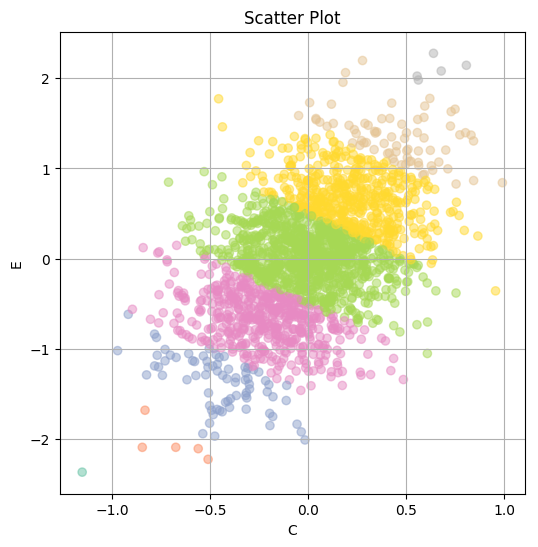

In [3]:
# Collider
nS = Int(2e3);   # number of samples
C = 0.3 * randn(nS);
E = C + 0.6 * randn(nS);
K = round.(C + E);
Ku = sort!(unique(K))

@printf("Correlation coeff C,E: %.2f\n", cor(C, E))
k = Ku[4]
@printf("Correlation coeff C,E|K=%d: %.2f\n", k, cor(C[K .== k], E[K .== k]))
flush(stdout)

fig = figure(figsize=(6, 6))
scatter(C, E, alpha=0.5, c=K, cmap=ColorMap("Set2"))
title("Scatter Plot")
xlabel("C")
ylabel("E")
grid("on")

## Berkson's paradox: collider with independent variables
a.k.a. Sampling bias

![Berkson's paradox or Sampling bias](simpsonscolliderInd_CG.svg)

### Why are handsome men such jerks?
Whether men are in a relationship ($R = 1$) is given by whether they are handsome ($H = 1$) **and** whether they are friendly ($F = 1$):

$$ 
H := \operatorname{Ber}(0.5) \\
F := \operatorname{Ber}(0.5) \\
R := \min(H, F) +_{2} \operatorname{Ber}(0.1)
$$

In this model a man is very likely to be in a relatioship if he is handsome and friendly, which are asusmed independent. Otherwise he is likely to be single. If you consider men that **are not in a relationship** ($R=0$), then $H$ and $F$ become anti-correlated: 
     
> *If you date handsome single men, they are likely to be unfriendly*

Reference:

> Ellenberg, Jordan (2014). How Not To Be Wrong:The Power of Mathematical Thinking. Penguin Books. pp. 295–362.

In [4]:
# Jerks
nS = Int(1e3)
H = rand([0, 1], nS)
F = rand([0, 1], nS)
R = mod.(min.(H, F) + rand(Int.([zeros(9); 1]), nS), 2)

@printf("Correlation coeff H,F: %.2f\n", cor(H, F))
k = Ku[4]
@printf("Correlation coeff H,F|R=0: %.2f\n", cor(H[R .== 0], F[R .== 0]))
flush(stdout)


Correlation coeff H,F: -0.01
Correlation coeff H,F|R=0: -0.42


## Experiment

You make a contorlled expeirment. Sometimes you see the phenomenon you are looking for, but sometimes you do not.

### Is it OK to work with and report only the trials that produced the phenomenon?

### Night-light causes myopia
A 1999 study established a dependence between the usage of a night light in a child’s room and the occurrence of myopia:
**intervene on night-light to avoid myopia!**

Subsequent studies (2000) found that the correlation is due to child’s parents myopia.
Myopic parents more likely put a night-light in their child’s room, who has an increased risk of inheriting the condition.

References:

> G. E. Quinn, C. H. Shin, M. G. Maguire, and R. A. Stone. Myopia and ambient lighting at night. Nature, 399:113–114, 1999.
> J. Gwiazda, E. Ong, R. Held, and F. Thorn. Vision: Myopia and ambient night-time lighting. Nature, 404:144, 2000.
> K. Zadnik, L. A. Jones, B. C. Irvin, R. N. Kleinstein, R. E. Manny, J. A. Shin, and D. O. Mutti. Vision: Myopia and ambient night-time lighting. Nature, 404:143–144, 2000.

## Model solves paradoxes

* Without the definition of the causal model, these paradoxes cannot be resolved.

* Model structures changes the way we solve the paradox (different models, different conclusions): *correlation doesn't imply causation*

* To know whether we need to *adjust* (condition on) and to choose what to adjust for, we need a SCM.

* Sometimes the needed model can be derived from the data generation process, e.g Did doctor consider the stone size to choose treatment?

* In causal models there are algorithmic criteria to decide what to adjust:

  * Parent adjustement
  * Backdoor criterion
  * Toward necessity 


# A glimpse into causal calculus
## Interventions

* Doctors choose the treatment based on stone size (severity) $Z$
* Stone size affects recovery **and** treatment
* Decide which treatment based on the result of randomized trials
* But we do not have that data! (could we ever have it?)

$$
P^{\text{do}(T := 0)}(R = 1) = \sum_{z=0}^1 P(R = 1 | T = 0, Z=z)P(Z=z) = 0.93 \cdot \frac{357}{700} + 0.73 \cdot \frac{343}{700} = 0.832\\
P^{\text{do}(T := 1)}(R = 1) = \sum_{z=0}^1 P(R = 1 | T = 1, Z=z)P(Z=z) = 0.87 \cdot \frac{357}{700} + 0.69 \cdot \frac{343}{700} = 0.782
$$

* The average causal effect of the treatment is

$$
P^{\text{do}(T := 0)}(R = 1) - P^{\text{do}(T := 1)}(R = 1) = 0.832 - 0.782
$$

* It is not the same as conditioning! *Correlation doesn't imply causation*
$$
P(R = 1 | T = 0) - P(R = 1 | T = 1) = 0.780 - 0.829
$$

Algebraic:
$$
P^{\text{do}(T := t)}(R = r) \neq P(R=r | T = t) \\
\sum_{z} P(R = r | T = t, Z = z)P(Z = z) \neq \sum_{z} P(R = r | T = t, Z = z)P(Z = z | T = t) 
$$

# Probabilistic vs. Causal inference

## Probabilistic inference (traditional statistics / machine learning)

* Asscoiative analysis
* Models the **distribution** of the data: *stork population and human birth are correlated*
* Focus on predicting consequences of **observations**: *predcit births based on observation of storks*

## Causal inference

* Cause(s)-Effect(s) analysis
* Models the **mechanism** that generates the data: *storks do not cause human births*
* Also allows to predcit results of **interventions**: *if we change the number of storks, what will happen with human birth rate?*

Reference:
> Joris Mooij (2018). Machine Learning summer school. Slides. https://staff.fnwi.uva.nl/j.m.mooij/talks/mlss2018.pdf